In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv
/kaggle/input/womens-shoes-prices/Datafiniti_Womens_Shoes.csv
/kaggle/input/womens-shoes-prices/7210_1.csv
/kaggle/input/womens-shoes-prices/Datafiniti_Womens_Shoes_Jun19.csv


In [ ]:
! jupyter nbconvert --to html your_notebook_name.ipynb.

In [95]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from IPython.display import HTML, display


Data source/credit: https://www.kaggle.com/aungpyaeap/supermarket-sales


**Supermarket Analysis**

* Branch: understand branch performance and drivers of growth 
* Product: which products should the stores continue to sell and prioritize, identify top sellers and best gross margin 
* Customer: what is the breakdown of customers (Member v Normal, Male v. Female)
* Payments: how are customers paying? Does payment type affect sales revenue?******

In [96]:
#Load the data
data = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

In [97]:
#Preview
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Numerical Variables: Unit Price,Quantity, Tax, COGs, Gross Margin %, Gross Income, Rating

Categorical Variables: Branch, City, Customer Type, Gender, Product Line, Payment

In [99]:
categorical = data[["Branch","City","Customer type","Gender","Product line","Payment"]]
categorical.nunique()


Branch           3
City             3
Customer type    2
Gender           2
Product line     6
Payment          3
dtype: int64

In [100]:
def get_unique_count(var):
    return data[var].value_counts()

for var in categorical:
     results = pd.DataFrame(get_unique_count(var))
     print(results)

   Branch
A     340
B     332
C     328
           City
Yangon      340
Mandalay    332
Naypyitaw   328
        Customer type
Member            501
Normal            499
        Gender
Female     501
Male       499
                        Product line
Fashion accessories              178
Food and beverages               174
Electronic accessories           170
Sports and travel                166
Home and lifestyle               160
Health and beauty                152
             Payment
Ewallet          345
Cash             344
Credit card      311


In [101]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [102]:
data.shape

(1000, 17)

In [103]:
#check for missing data
missing = data.isnull().sum()
missingcheck = missing[missing > 0]
missingcheck

#There are no missing data entries

Series([], dtype: int64)

**Branch Performance Analysis**

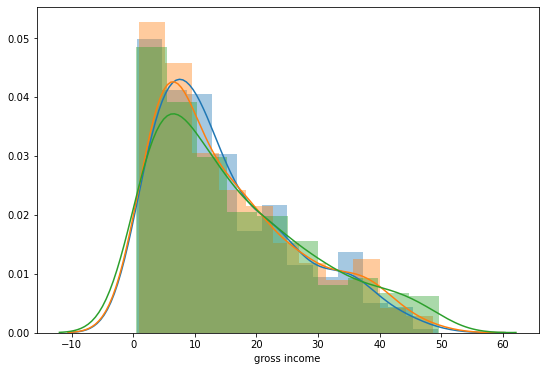

In [104]:
plt.figure(figsize= (9,6))


g1 = sns.distplot(data[data['Branch']=='A']['gross income'], hist=True, label="A")
g1 = sns.distplot(data[data['Branch']=='B']['gross income'], hist=True, label="B")
g1 = sns.distplot(data[data['Branch']=='C']['gross income'], hist=True, label="C")


In [105]:
data['gross income'].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross income, dtype: float64

In [106]:
#Gross Income Distrbution
print(data['gross income'].skew())
print(data['gross income'].kurt())

0.892569804958142
-0.08188475790435179


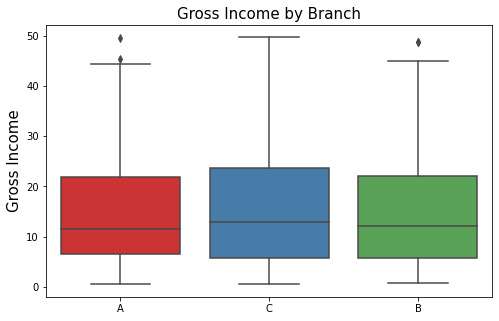

In [107]:
plt.figure(figsize = (8,5))

p = sns.boxplot(x=data['Branch'], y=data['gross income'], data=data, palette="Set1")
p.set_xticklabels(p.get_xticklabels())
p.set_title("Gross Income by Branch", fontsize=15)
p.set_xlabel("",fontsize=15)
p.set_ylabel("Gross Income", fontsize=15)

plt.show()

In [108]:
print(data['gross income'].quantile(0.99))
data[data['gross income'] > 45.25]

45.25075


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
429,325-77-6186,A,Yangon,Member,Female,Home and lifestyle,90.65,10,45.325,951.825,3/8/2019,10:53,Ewallet,906.5,4.761905,45.325,7.3
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


In [109]:
quantity_by_branch = data.groupby("Branch")["Quantity","gross income"].sum()
quantity_by_branch

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Quantity,gross income
Branch,,
A,1859,5057.1605
B,1820,5057.0320
C,1831,5265.1765


We need to transform the date data since it was an object type

In [110]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])
#no need to include year since there is only one year (2019)
data['day'] = (data['Date']).dt.day
data['month'] = (data['Date']).dt.month
data['hour'] = (data['Time']).dt.hour
data['weekday'] = (data['Date']).dt.day_name()

Our sales data spans from Jan 1, 2019 to March 30, 2019. Has the quantity sold been increasing over the past few months? 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


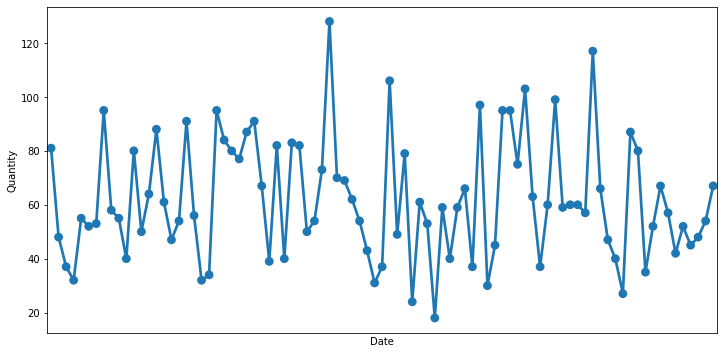

In [111]:
import matplotlib.dates as mdates

sorted = data.sort_values(by='Date')
sorted = sorted.groupby('Date')['Quantity','gross income'].sum().reset_index()
sorted

months = mdates.MonthLocator() 

plt.figure(figsize=(12,6))
g1 = sns.pointplot(sorted['Date'], sorted['Quantity'], label='Quantity')
g1.xaxis.set_major_locator(months)

plt.show()

There isn't an overall increase in quantity sold over the three months, however there are peaks in February and March

**Product Analysis**

In [112]:
product_avg = data.groupby("Product line")["gross income","Unit price","Quantity"].mean().reset_index()
product_avg

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Product line,gross income,Unit price,Quantity
0,Electronic accessories,15.220597,53.551588,5.711765
1,Fashion accessories,14.528062,57.153652,5.067416
2,Food and beverages,15.365310,56.008851,5.471264
3,Health and beauty,15.411572,54.854474,5.618421
4,Home and lifestyle,16.030331,55.316937,5.693750
5,Sports and travel,15.812630,56.993253,5.542169


In [113]:
product_totals = data.groupby("Product line")["Quantity"].sum()


Text(0.5, 1.0, 'Totall Quantity by Product Line')

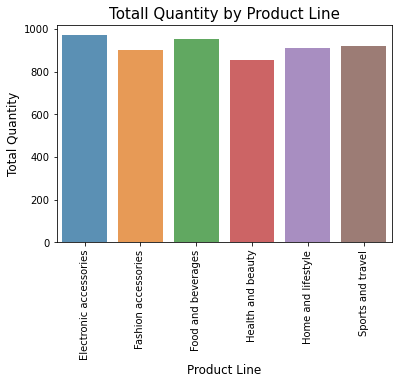

In [114]:
sns.barplot(x=product_totals.index, y=product_totals.values, alpha=0.8)
plt.ylabel('Total Quantity', fontsize=12)
plt.xlabel('Product Line', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Totall Quantity by Product Line', fontsize=15)


In [115]:
unitprice_prod = data.groupby("Product line")["Unit price"].mean().reset_index()
unitprice_prod

,Product line,Unit price
0,Electronic accessories,53.551588
1,Fashion accessories,57.153652
2,Food and beverages,56.008851
3,Health and beauty,54.854474
4,Home and lifestyle,55.316937
5,Sports and travel,56.993253


Text(0.5, 1.0, 'Average Unit Price by Product')

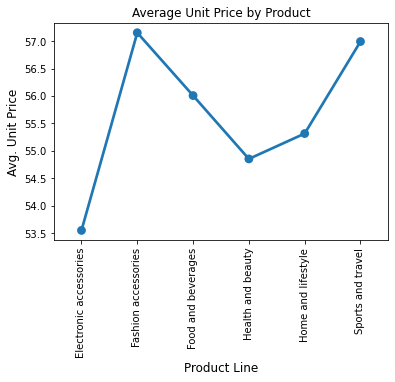

In [116]:
unitprice_prod = data.groupby("Product line")["Unit price"].mean()

sns.pointplot(x=unitprice_prod .index, y=unitprice_prod .values, alpha=0.8)
plt.ylabel('Avg. Unit Price', fontsize=12)
plt.xlabel('Product Line', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Average Unit Price by Product', fontsize=12)

These unit price are used to calculate COGS and reflect how expensive it is to manufacture these goods, so electronic goods have the cheapest unit price and fashion accessories and sports and travel are the most expensive 

Given each invoice/entry has a different quantity, let's also calculate gross income by one unit of quantity

In [117]:
data['gross_income_by_unit'] = data['gross income'] / data['Quantity']
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,day,month,hour,weekday,gross_income_by_unit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,13,Saturday,3.7345
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,3,10,Friday,0.7640
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,13,Sunday,2.3165
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,1,20,Sunday,2.9110
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,2,10,Friday,4.3155


Text(0.5, 1.0, 'Gross Income by Unit')

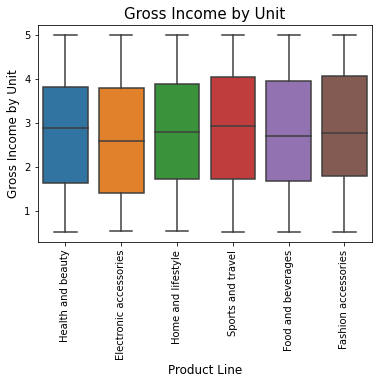

In [118]:
sns.boxplot(x="Product line", y="gross_income_by_unit",data=data)
plt.ylabel('Gross Income by Unit', fontsize=12)
plt.xlabel('Product Line', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Gross Income by Unit', fontsize=15)

In [119]:
gross_by_unit_prod = data.groupby("Product line")["gross_income_by_unit"].mean()
gross_by_unit_prod

Product line
Electronic accessories    2.677579
Fashion accessories       2.857683
Food and beverages        2.800443
Health and beauty         2.742724
Home and lifestyle        2.765847
Sports and travel         2.849663
Name: gross_income_by_unit, dtype: float64

**Customer Analysis**

When do customers shop most frequently?

'Date' is an object so we need to transform it to datetime

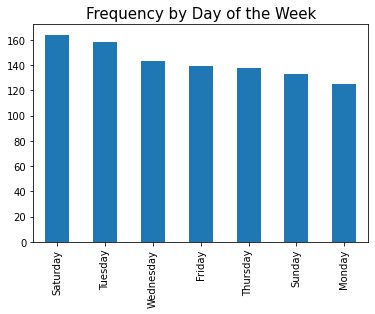

In [120]:
data['weekday'].value_counts().plot(kind="bar")
plt.title("Frequency by Day of the Week", fontsize=15)
plt.show()

Saturday and Tuesday seem to be more popular days than Sunday or Monday

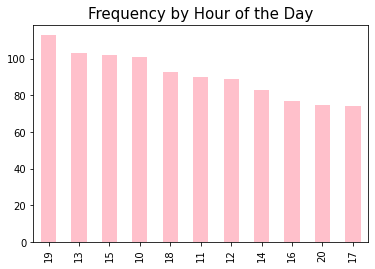

In [121]:
data['hour'].value_counts().plot(kind="bar", color='pink')
plt.title("Frequency by Hour of the Day", fontsize=15)
plt.show()

Evenings is the most frequent time

In [122]:
grouped_data = data.groupby(['weekday','hour'])["Invoice ID"].aggregate("count").reset_index()
grouped_data = pd.DataFrame(data=grouped_data)
grouped_data = grouped_data.pivot(index='weekday', columns='hour', values='Invoice ID')

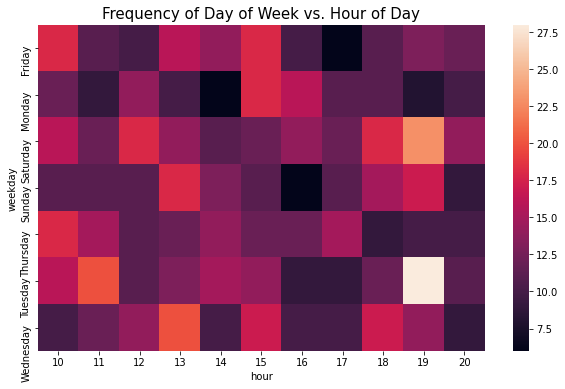

In [123]:
plt.figure(figsize=(10,6))
sns.heatmap(grouped_data)
plt.title("Frequency of Day of Week vs. Hour of Day", fontsize=15)
plt.show()

Tuesday evening is the most popular time to shop

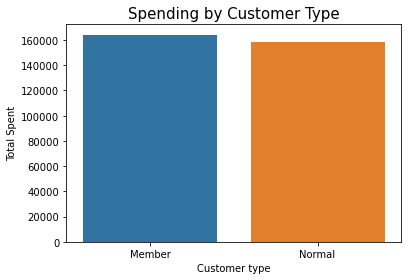

In [124]:
grouped_members = data.groupby('Customer type')["Total"].sum()
sns.barplot(x=grouped_members.index, y=grouped_members.values)
plt.xlabel('Customer type')
plt.ylabel('Total Spent')
plt.title('Spending by Customer Type',fontsize=15)
plt.show()

Members do not spend much more than non-members, there could be an opportunity for a new strategy for a rewards/loyalty program

**Payment Type**

In [125]:
payment_type = data.groupby("Payment")['Total'].sum()
payment_type.index

Index(['Cash', 'Credit card', 'Ewallet'], dtype='object', name='Payment')

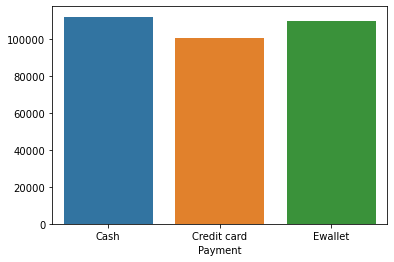

In [126]:
sns.barplot(x=payment_type.index, y=payment_type.values)

Payment type is relatively consistent across the three different groups